<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" style="width:400px;height:200px;">
<h1 color="blue">Support Vector Machine</h1>

SVM draws a hyper plane in n dimensional space such that it maximize the margin between (classifucation grps) the near by data points and the line itself.

Gamma and regularization

with low gamma,low regularization sometimes we might get problem with the acuurecy
creating a 3 rd dimension when we are unable draw a decision doundary with given dimaensions 
this transformation to z dimension  when x,y are given is called kernel.

In [76]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [77]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [78]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [79]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [80]:
df  = pd.DataFrame(iris.data,columns = iris.feature_names)

In [81]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [85]:
df['flower_name']= df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [86]:
%matplotlib inline

In [87]:
df0 = df[df.target==0]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [88]:
df1 = df[df.target==1]
df2=df[df.target==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [89]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


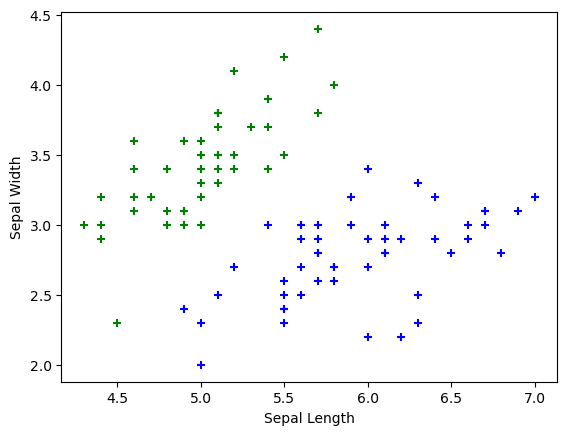

In [90]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='+') 

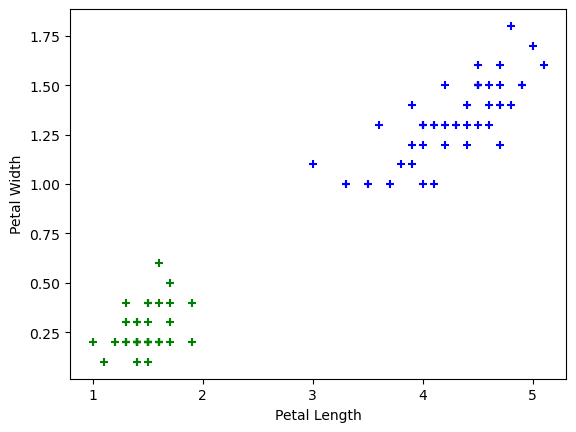

In [91]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker = '+')

In [92]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
len(X_train)

120

In [95]:
len(X_test)

30

In [96]:
from sklearn.svm import SVC
model = SVC()

In [97]:
model.fit(X_train, y_train)

SVC()

In [98]:
model.score(X_test, y_test)

0.9666666666666667

In [99]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

regularization
         c It controls the trade-off between maximizing the margin (distance between the decision boundary and the support vectors) and minimizing classification errors.

In [101]:
model_C = SVC(C=12) 
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

C is another hyperparameter in SVMs that represents the regularization parameter or the cost of misclassifying training examples.
A smaller C value encourages a larger margin and allows some misclassification of training examples. This can lead to a more generalized model but may miss some data points.
A larger C value reduces the margin and penalizes misclassification more heavily. This can result in a narrower margin and a model that fits the training data more closely.
C helps control the balance between bias and variance, similar to gamma

In [100]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [102]:
model_C = SVC(C=57)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [103]:
model_C = SVC(C=100)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [104]:
model_C = SVC(C=0.7)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

Gamma is a hyperparameter in SVMs that defines the influence of a single training example. It determines the shape of the decision boundary.
A small gamma value means the influence of a single training example is broader, resulting in a smoother decision boundary. This can lead to underfitting.
A large gamma value means the influence of a single training example is more focused, resulting in a more complex and wiggly decision boundary. This can lead to overfitting.
Gamma is crucial for fine-tuning the SVM's performance. It controls the trade-off between bias and variance.

In [105]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)


0.9666666666666667

The kernel in SVMs defines the function used to transform the input data into a higher-dimensional space, where a linear separation is easier to find.
Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels.
The choice of the kernel function affects the shape and flexibility of the decision boundary.
Different data distributions may require different kernel functions for optimal performance.
The kernel trick allows SVMs to find complex nonlinear decision boundaries in higher-dimensional spaces while only computing the dot products in the original input space.

In [106]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)


SVC(kernel='linear')

In [107]:
model_linear_kernal.score(X_test, y_test)

1.0

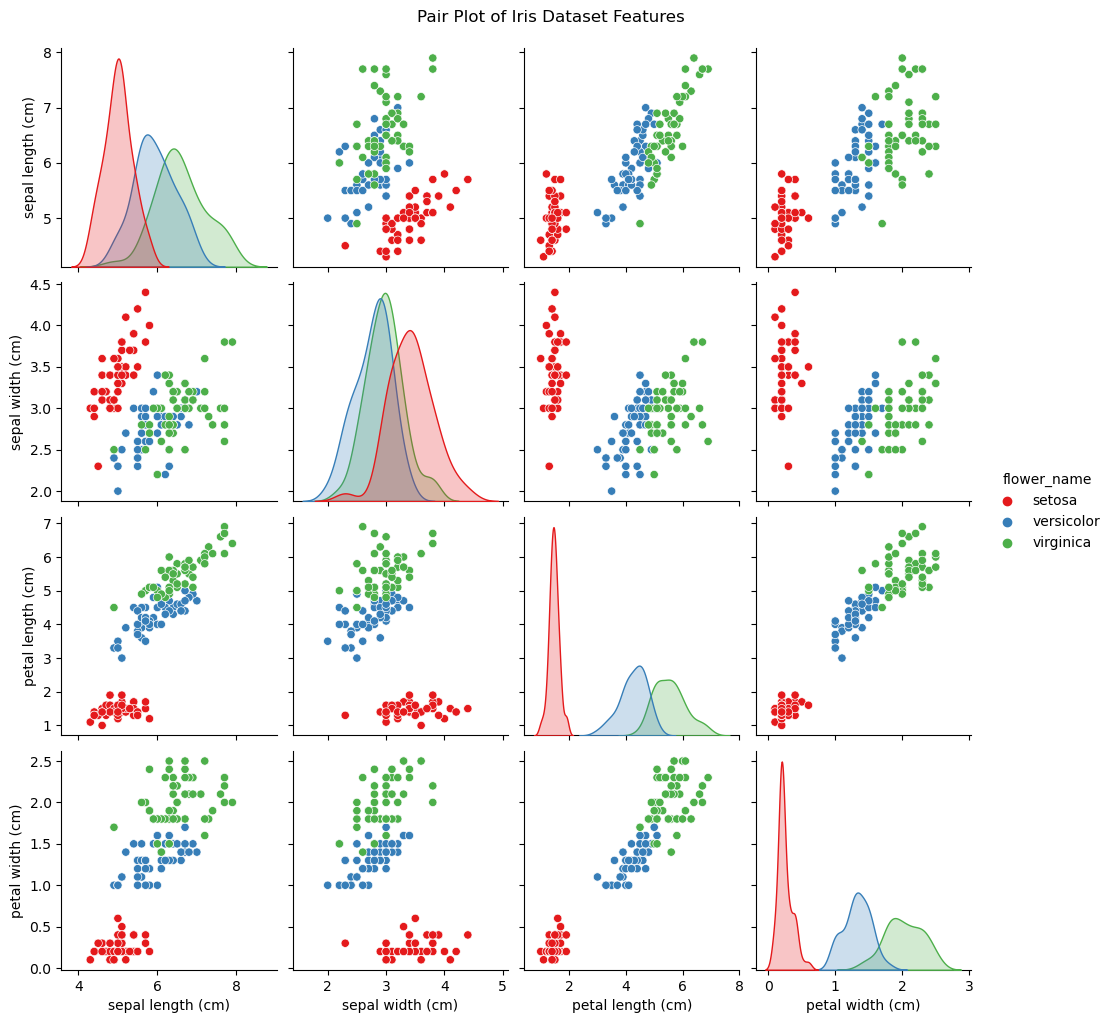

In [108]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for visualization
selected_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Create a pair plot with class labels as hue
sns.pairplot(df, vars=selected_features, hue='flower_name', palette='Set1')

# Add titles to the plots
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)

# Show the plot
plt.show()


